Now Recording...
Finished Recording.


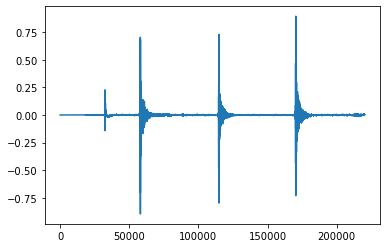

In [1]:
import pyaudio
import numpy
import matplotlib.pyplot as plt
import wave

chunk = 1024
FORMAT = pyaudio.paInt16

CHANNELS = 1 #モノラル（2にするとステレオ）
RATE = 44100 #サンプルレート（録音の音質）
RECORD_SECONDS = 5 #録音時間

p = pyaudio.PyAudio()

stream = p.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

#レコード開始
print("Now Recording...")
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk) #音声を読み取って、
    all.append(data) #データを追加

#レコード終了
print("Finished Recording.")

stream.close()
p.terminate()

#data = ''.join(all) #Python2用
data = b"".join(all) #Python3用

#録音したデータを配列に変換
result = numpy.frombuffer(data,dtype="int16") / float(2**15)

plt.plot(result)
plt.show()

In [25]:
result

array([ 0.00000000e+00,  0.00000000e+00, -3.05175781e-05, ...,
        3.96728516e-04,  4.27246094e-04,  4.27246094e-04])

In [26]:
import pandas as pd

In [27]:
sound = pd.DataFrame(result)

In [28]:
sound.tail()

,0
220155,0.000397
220156,0.000397
220157,0.000397
220158,0.000427
220159,0.000427


In [39]:
sound["time"] = range(0,len(sound)) #x軸用に、時間軸を作成

In [40]:
sound.tail()

,0,time
220155,0.000397,220155
220156,0.000397,220156
220157,0.000397,220157
220158,0.000427,220158
220159,0.000427,220159


In [45]:
sound["time"] = sound['time']*(RECORD_SECONDS/(len(sound)-1))

In [46]:
sound.tail()

,0,time
220155,0.000397,4.999909
220156,0.000397,4.999932
220157,0.000397,4.999955
220158,0.000427,4.999977
220159,0.000427,5.000000
